<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg">
<center>
<p>
<h1>Algorítmica Avanzada</h1>
<h2>Problemas 2 - Greedy </h2>
</center>
</p>
</div>

<div style="width:90%; margin:0 auto;">
  <h2><p>Minimum Spanning Tree</p></h2>
  <p>
Dado un grafo conexo y no dirigido, un spanning tree de ese grafo es un subgrafo que tiene que ser un árbol (sin ciclos) y contener todos los vértices del grafo inicial. Cada arista tiene asignado un peso, que es un número representativo de algún objeto, distancia, etc. y se usa para asignar un peso total al MST computando la suma de todos los pesos de las aristas del árbol en cuestión. Un MST o minimum spanning tree es un árbol recubridor que pesa menos o igual que caulquier otro árbol recubridor de ese grafo. Todo grafo tiene un bosque recubridor mínimo.
  </p>
<img width="300px" src="img/mst.png">
  </div>



<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>1- Kruskal Algorithm</p></h2>
  El algoritmo de Kruskal es un algoritmo voraz que calcula el MST de un grafo dado. Se basa en ir añadiendo a cada paso la arista más pequeña del grafo que conecte dos subárboles que no estaban previamente conectados.
    
   <center><img width="250px" src="./img/KruskalDemo.gif"></center>

<p>
En este apartado tendréis que implementar el algoritmo de Kruskal para obtener el Minimum Spanning Tree de cualquier grafo no dirigido. 
  </p>


In [1]:
# Imports
import networkx as nx

In [2]:
def kruskal(G):
    """ 
    Implementación del algoritmo de Kruskal para obtener el MST de un grafo cualquiera.
    
    Parameters
    ----------
        G, nx.Graph
            El grafo de tipo nx.Graph sobre el que queremos obtener el MST. 
            Las aristas tienen el atributo 'weight' que indica su peso.
    
    Returns
    -------
        tree, nx.Graph
            El grafo de tipo nx.Graph que contiene el arbol de expansión mínima.
        weight, float or int 
            El peso total del grafo tree.
    """
    
    tree_edges = [] 
    
    # We init the singelton list of the nodes
    # and the ordered edge list (ascending)
    nodes = list({e} for e in G.nodes)
    edges = sorted(G.edges.items(), key=lambda e: e[1]["weight"])
    
    # Loop over all the edges
    # in ascending weight order
    for (u, v), w in edges:
        # Find the sets containing u and v
        set_u = set_v = None
        u_i = v_i = None
        
        for i, n in enumerate(nodes):
            if (set_u is not None) and (set_v is not None):
                break
            
            if u in n:
                set_u = n
                u_i = i
                
            if v in n:
                set_v = n
                v_i = i
        
        # Check if the two sets are different
        # if so, we add the edge to the MST edge
        # list, update the total 
        if set_u is not set_v:
            tree_edges.append((u, v, {"weight": w["weight"]}))
            
            nodes[u_i] |= nodes[v_i]
            del nodes[v_i]
    
    mst = nx.Graph(tree_edges)
    return mst, sum([w["weight"] for _,w in mst.edges.items()])

### Testing

In [3]:
from utils import draw_graph

edges = [
    (1, 2, {"weight": 1}), 
    (2, 3, {"weight": 2}), 
    (3, 4, {"weight": 1}),
    (1, 5, {"weight": 3}),
    (6, 8, {"weight": 9}), 
    (7, 8, {"weight": 3})]

g = nx.Graph(edges)
t, total = kruskal(g)
print(f"MST weight: {total}")

edges_t = t.edges()
edges_o = [x for x in g.edges() if x not in edges_t]
draw_graph(g, edges_t, edges_o, nx.spring_layout(g))

MST weight: 19



<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>2- Prim Algorithm</p></h2>
  Igual que Kruskal, el algoritmo de Prim es un algoritmo voraz que calcula el MST de un grafo dado. La diferencia fundamental es en el orden en que se añaden aristas. Prim empieza en un nodo concreto y se basa en ir añadiendo a cada paso la arista más pequeña de entre las que conectan los nodos ya pertenecientes al árbol con sus vecinos.
    
   <center><img width="250px" src="./img/PrimDemo.gif"></center>

<p>
En este apartado tendréis que implementar el algoritmo de Prim para obtener el Minimum Spanning Tree de cualquier grafo no dirigido y conexo. 
  </p>


In [4]:
def prim(G, origen=None, infinity=float('inf')):
    """ 
    Implementación del algoritmo de Kruskal para obtener el MST de un grafo cualquiera.
    
    Parameters
    ----------
        G, nx.Graph 
            El grafo sobre el que queremos obtener el MST. 
            Las aristas tienen el atributo 'weight' que indica su peso.
        origin (optional), node_id
            nodo por el cual comenzar la búsqueda.
        infinity (optional), float
            valor para inicializar las distancias.
    
    Returns
    -------
        tree, nx.Graph
            El grafo que contiene el arbol de expansión mínima.
        weight, float or int
            El peso total del grafo tree.
    """
    
    tree_edges, tree_nodes, nodes = [], [], list(G.nodes)
    
    # If origen is None we take the first node
    if origen is None:
        origen = list(G.nodes)[0]
    
    # This will be the boundary edges list
    boundary = sorted(
        [
            (origen, w, G.edges[(origen, w)]) 
            for w in G.neighbors(origen) 
            if w is not origen
        ], key=lambda x: x[2]["weight"]
    )
    
    tree_nodes.append(origen)
    nodes.remove(origen)
        
    while len(nodes) > 0:
        # We take the boundary edges
        # with minimum weight
        _e = boundary[0]
        _w = _e[1]
        
        # Check if the end of the edge
        # is in the nodes list
        if _w not in nodes:
            boundary = boundary[1::]
            continue
        
        # Update the tree lists
        # and remove the adjacent from nodes
        tree_edges.append(_e)
        tree_nodes.append(_w)
        nodes.remove(_w)
                
        # Update the boundary edge list
        # and sort it 
        boundary = boundary[1::] + [
            (_w, _v, G.edges[(_w, _v)]) 
            for _v in G.neighbors(_w) 
            if (_v not in tree_nodes)
        ]
        boundary = sorted(boundary, key=lambda x: x[2]["weight"])
    
    mst = nx.Graph(tree_edges)
    return mst, sum([w["weight"] for _,w in mst.edges.items()])

### Testing

MST weight: 7


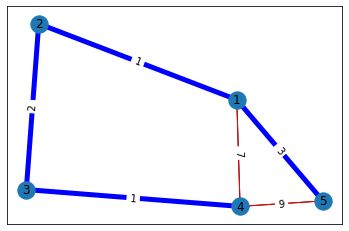

In [5]:
from utils import draw_graph

edges = [
    (1, 2, {"weight": 1}), 
    (2, 3, {"weight": 2}), 
    (3, 4, {"weight": 1}), 
    (4, 5, {"weight": 9}), 
    (4, 1, {"weight": 7}),
    (1, 5, {"weight": 3})]

g = nx.Graph(edges)
t, total = prim(g)
print(f"MST weight: {total}")

edges_t = t.edges()
edges_o = [x for x in g.edges() if x not in edges_t]
draw_graph(g, edges_t, edges_o, nx.spring_layout(g))

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Tests </h3></p> </center>
<p>
Realiza los tests pertinentes en las celdas dispuestas a continuación.
</p>
</div>


TOTAL MST WEIGHT
NX MST  21
Kruskal 21
Prim    21


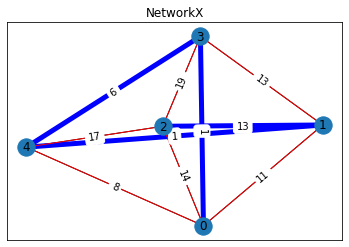

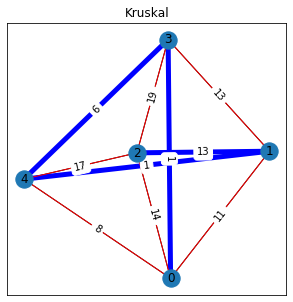

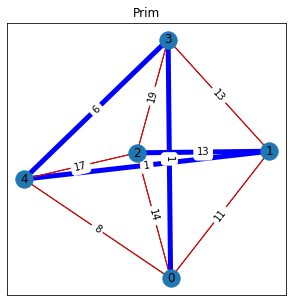

In [6]:
%matplotlib inline
from utils import *

# Create random Graph
num_v = 5 # Num nodes
num_e = 15 # Num edges
G = generate_random_graph(num_v, num_e)

# Run test
test_algs(G, kruskal, prim, 0) # 0 for both, 1 for kruskal only, 2 for prim only

<div class="alert alert-warning">
<h1>Pregunta 1</h1>
<p><strong>
Explica las diferencias entre los algoritmos de Kruskal y Prim. ¿Para qué casos (características concretas de un grafo) es uno más eficiente que el otro?
</strong></p>
</div>

### Diferencies

En el cas de Kruskal s'itera respecta les arestes del graf, i en el cas de Prim, respecte els nodes.
Concretament, en l'algortime Kruskal s'itera fins a tenir tots els nodes conectats.
En l'algoritme Prim, fins que tots els nodes límit de l'arbre no poden extendres més, donat que generarien un cicle.

### Use cases

En el cas de que tinguem un graf disconex, l'algoritme de Prim no funciona correctament. Per tant, en casos de grafs amb diverses components disconnexes, s'utilitza Kruskal.

Tot i així, en casos en que el graf és dens, l'lagoritme de Prim serà molt més ràpid (en quan a complexitat de temps) que Kruskal.

<div class="alert alert-warning">
<h1>Pregunta 2</h1>
<p><strong>
Explica tu implementación y analiza la complejidad de ambos algoritmos.
</strong></p>
</div>

### Implementació
#### Kruskal
Sigui `G` el graf inicial i `o`, el node inicial per el qual volem trobar el MST.

1. Definim `n` com el conjunt de singletons amb els nodes de `G`.
1. Iterem sobre la llista d'arestes de `G` ordenades decreixentment respecte el pes.
    1. Trobem els cojunts `u` i `v` de `n` contenint els nodes de l'aresta.
    1. Si `u` i `v` són diferents
        1. Afagim l'aresta a `T`
        1. Unim `u` i `v` en `n`
1. `T` és el MST de `G`.

#### Prim
Sigui `G` el graf inicial i `o`, el node inicial per el qual volem trobar el MST.

1. Guardem els nodes de `G` en un conjunt `n`. 
1. Afagim el node origen a un graf `T`.
1. Computem la llista s'arestes `b` des de `o` en `G`, i la ordenem de manera creixent respecte el pes d'aquestes.
1. Mentre el conjunt `n` tingui algun element:
    1. Prenem l'aresta `e` amb pes més petit de `b`.
    1. Comporvem si el final d'`e` està en `n`, si ho està la treiem. Sinó, tornem a 4.
    1. Afagim `e` a `T`.
    1. Tornem a computar `b` amb els nodes extrems de `T` i ordenem.
1. `T` és el MST de `G`.

### Complexitats
#### Kruskal
$
O(E \log V)
$

#### Prim
$
O(V \log E)
$

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
</center>
<p>
La entrega de esta práctica se podrá realizar en el campus virtual hasta el día <b>17 de Noviembre a las 23:55</b>. En la tarea que se habilitará en el campus deberéis colgar <b>únicamente este notebook</b> con el nombre:
</p>
<p>
```
[grupo]_[apellido]_[nombre]_2-Greedy.ipynb
```

</p>
<p>
    Por ejemplo, para un alumno llamado <i>Nombre Genérico</i> perteneciente al <i>grupo Z</i> el nombre del archivo debería ser:
</p>
<p>
```
Z_Generico_Nombre_2-Greedy.ipynb
```

Y <b>NO</b>:
<ul>
<li>Z00_Generico_Nombre_2-Greedy.zip</li>
    
<li>ZX_Generico_Nombre_2-Greedy.ipynb</li>

<li>Lab2_Generico_Nombre_2-Greedy.rar</li>

<li>2-Greedy.ipynb</li>
<li> ... literalmente cualquier otra cosa que no sea el nombre que sí hay que ponerle </li>
</ul>
</p>
<p>

Es muy importante que en el notebook exista <b> una sola función </b> con el nombre <i>kruskal</i> y <i>prim</i> ya que emplearemos un corrector automático para agilizar el proceso. Podéis tener tantas funciones auxiliares como queráis, pero no puede haber dos funciones con el mismo nombre. No os preocupéis si no os funciona del todo, el no pasar los tests no significa necesariamente que tengáis un 0 en la práctica; también revisaremos manualmente el código así como los comentarios del final del notebook y vuestro análisis de complejidad.


Es fundamental que el código esté bién comentado y con un análisis de complejidad exhaustivo del algoritmo. La importancia de poner nombre correcto al archivo debería ser directamente proporcional a lo contentos que queráis que los profesores de prácticas corrijan.<b> No adherirse al formato en el nombre del archivo así como entregar otro tipo de archivo o varios archivos, conllevará a la no corrección de vuestra práctica.</b>
</p>
</div>